In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
import os
from cmap import Colormap
from scipy import ndimage

mpl.rcParams['font.family'] = 'arial'
mpl.rcParams['font.size'] = 14
mpl.rcParams['animation.ffmpeg_path'] = 'D:/Program Files/FFmpeg/bin/ffmpeg.exe'

data_directory = 'slice_map'
timestamp = 495

filename_x = os.path.join(data_directory, str(timestamp) + '-x.txt')
filename_y = os.path.join(data_directory, str(timestamp) + '-y.txt')

map_x = pd.read_csv(filename_x, delimiter=',', header=None).to_numpy()
map_y = pd.read_csv(filename_y, delimiter=',', header=None).to_numpy()
map_x[map_x == -np.inf] = 0
map_y[map_y == -np.inf] = 0

src_loc = pd.read_csv('src_loc.txt', delimiter='\t', header=None).to_numpy()
src1 = src_loc[:, :3]
src2 = src_loc[:, 3:]

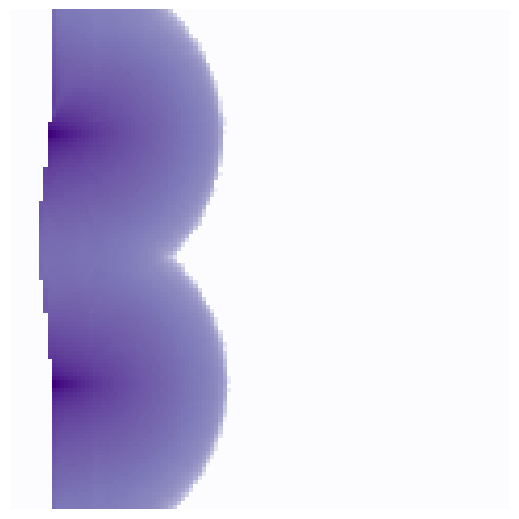

In [181]:
fig, ax = plt.subplots(figsize=(5, 5))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
ax.pcolormesh(map_x, cmap=Colormap('colorbrewer:purples').to_matplotlib())
ax.set_axis_off()
plt.show()

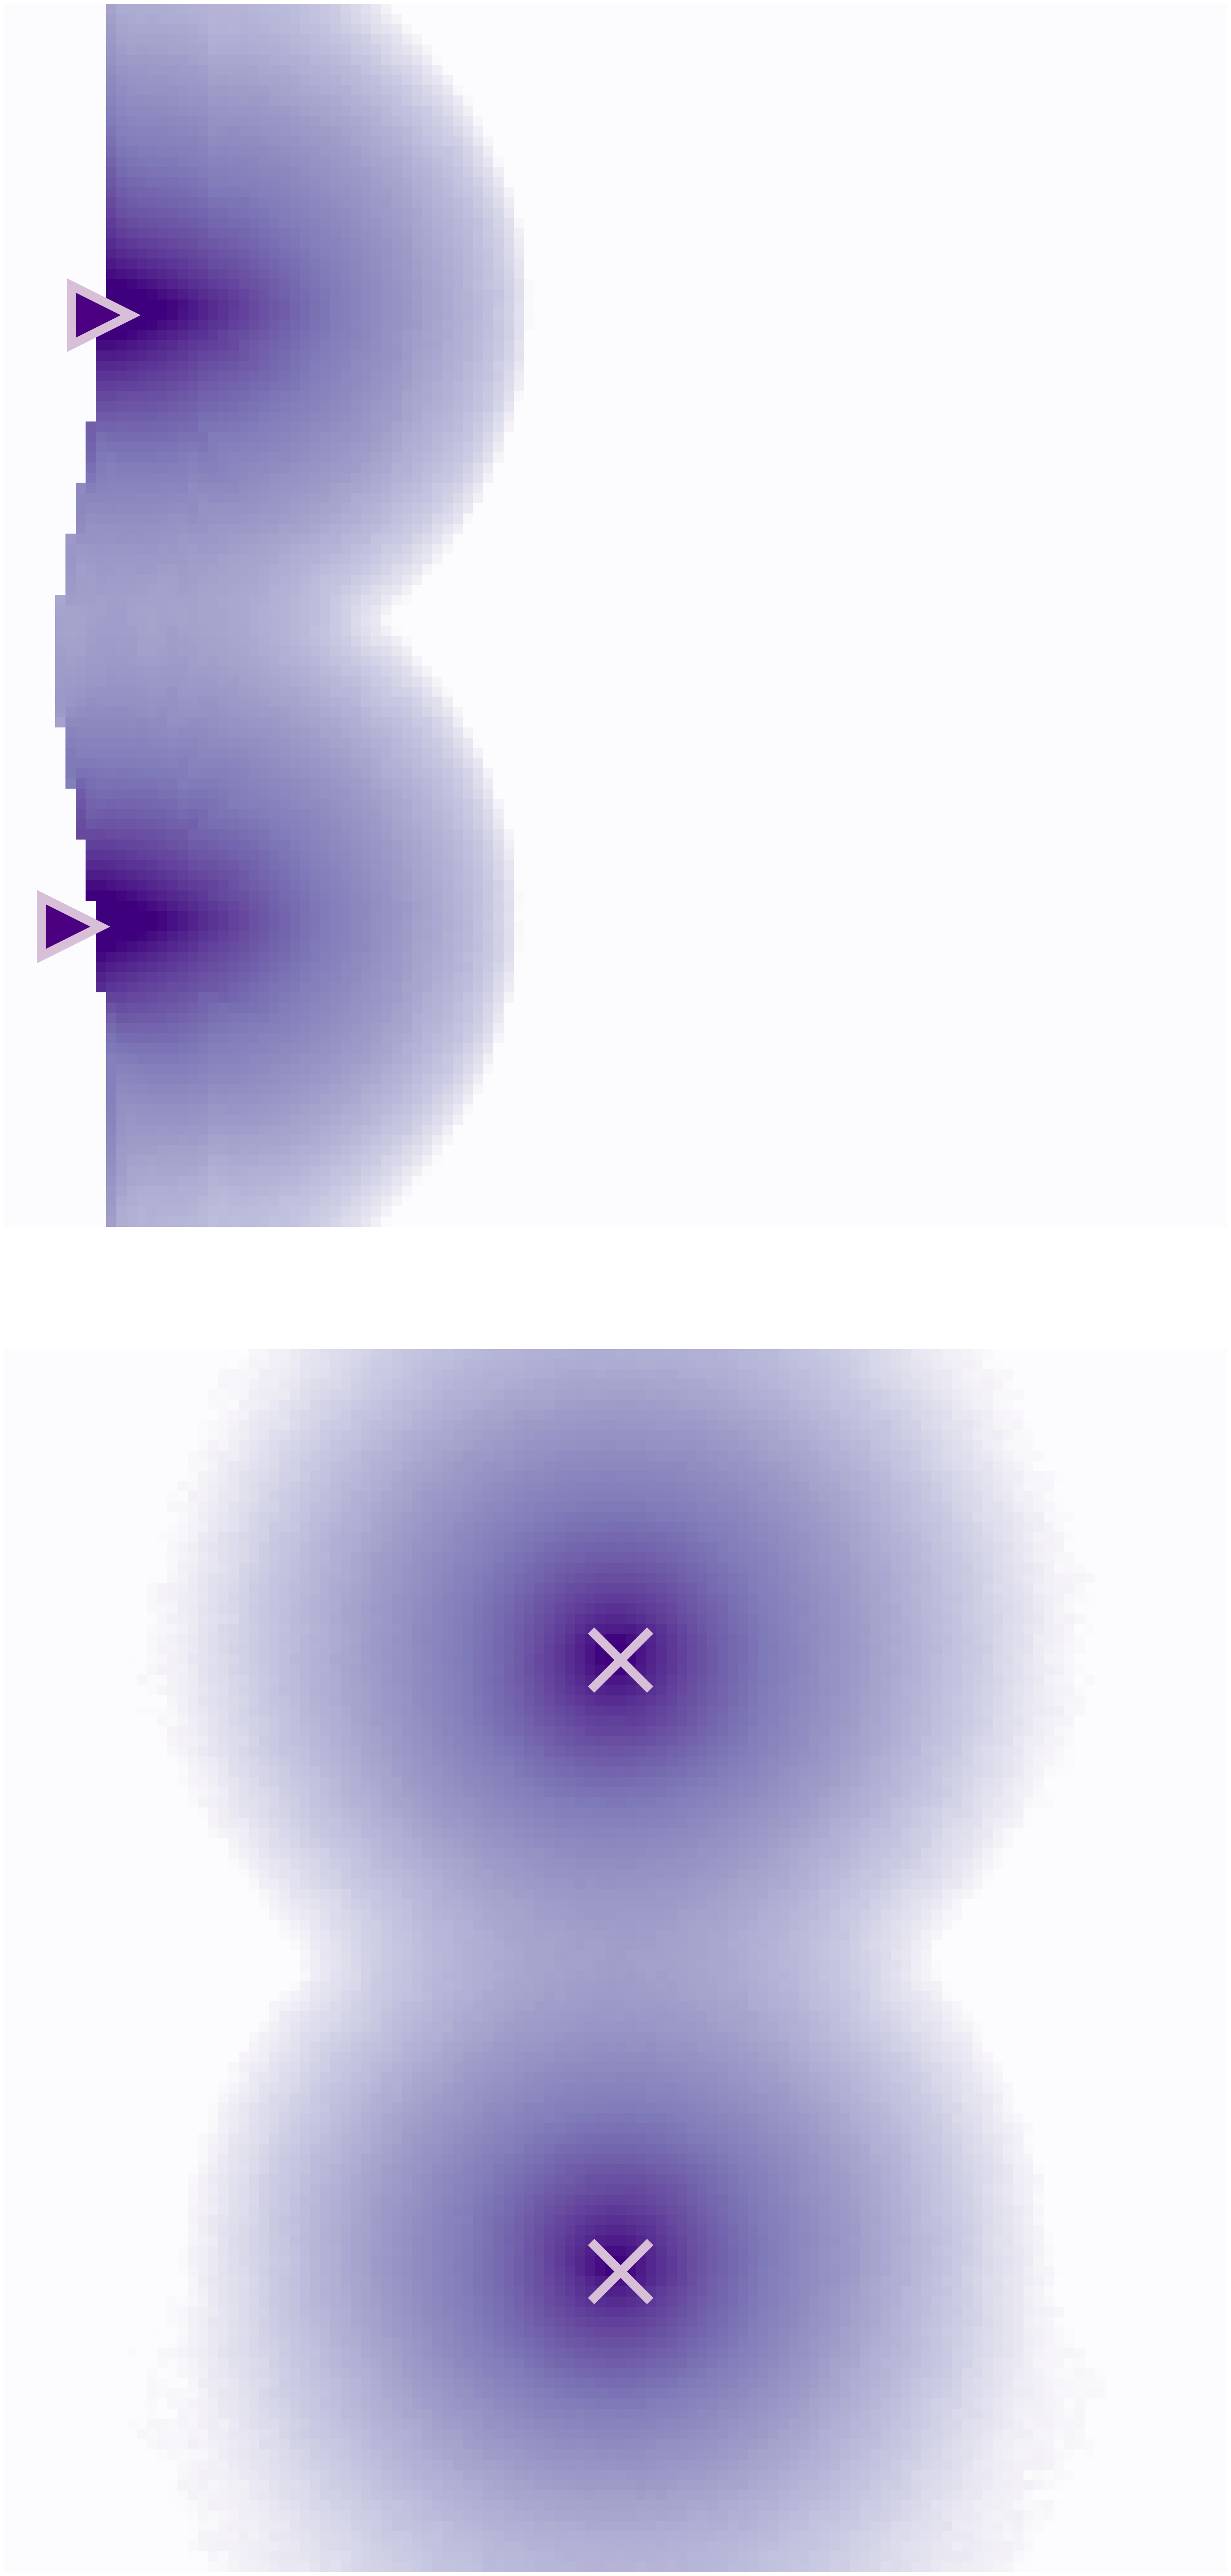

In [3]:
def load_map(data_directory, direction, timestamp):
    filename = os.path.join(data_directory, str(timestamp) + '-' + direction + '.txt')
    data = pd.read_csv(filename, delimiter=',', header=None).to_numpy()
    data[data == -np.inf] = 0
    return data

def animate(i):
    map_x = load_map(data_directory, 'x', i)
    map_y = load_map(data_directory, 'y', i)
    print(f"Frame {i}, shape: {map_x.shape}, type: {map_x.dtype}")  # Debug print
    imgx.set_array(map_x)
    imgy.set_array(map_y)

    srcx1.set_data([src1[frames.index(i), 2]], [src1[frames.index(i), 1]])
    srcx2.set_data([src2[frames.index(i), 2]], [src2[frames.index(i), 1]])
    srcy1.set_data([src1[frames.index(i), 0]], [src1[frames.index(i), 1]])
    srcy2.set_data([src2[frames.index(i), 0]], [src2[frames.index(i), 1]])
    
    return imgx, imgy, srcx1, srcx2, srcy1, srcy2,

data_directory = 'slice_map'    
frames = sorted(set(int(name.split('-')[0]) for name in os.listdir(data_directory)))

src_loc = pd.read_csv('src_loc.txt', delimiter='\t', header=None).to_numpy()
src1 = src_loc[:, :3]
src2 = src_loc[:, 3:]

# init canvas
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(30, 60))
# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(3, 6))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=0.1)
init_map_x = load_map(data_directory, 'x', frames[0])
init_map_y = load_map(data_directory, 'y', frames[0])
imgx = axes[0].imshow(init_map_x, cmap=Colormap('colorbrewer:purples').to_matplotlib(), animated=True,
                      vmin=9, vmax=18)
imgy = axes[1].imshow(init_map_y, cmap=Colormap('colorbrewer:purples').to_matplotlib(), animated=True,
                      vmin=9, vmax=18)
srcx1, = axes[0].plot(src1[0, 2], src1[0, 1], '>', ms=100, mew=15, c='indigo', mec='thistle')
srcx2, = axes[0].plot(src2[0, 2], src2[0, 1], '>', ms=100, mew=15, c='indigo', mec='thistle')
srcy1, = axes[1].plot(src1[0, 0], src1[0, 1], 'x', ms=100, mew=15, c='thistle')
srcy2, = axes[1].plot(src2[0, 0], src2[0, 1], 'x', ms=100, mew=15, c='thistle')

for ax in axes:
    ax.set_axis_off()

# anim = FuncAnimation(fig, animate, frames=frames, blit=True)

# writer = FFMpegWriter(fps=12)
# anim.save('xz.mp4', writer=writer)

In [4]:
c = []
b = []
for idx, frame in enumerate(frames):
    map_y = load_map('slice_map', 'y', frame)
    det_loc1 = np.array([src1[idx][0], src1[idx][1]])
    det_loc2 = np.array([src2[idx][0], src2[idx][1]])
    det_loc1[1] -= 5
    det_loc2[1] -= 5
    c.append(map_y[det_loc1[0], det_loc1[1]])
    b.append(map_y[det_loc2[0], det_loc2[1]])

(400.0, 700.0)

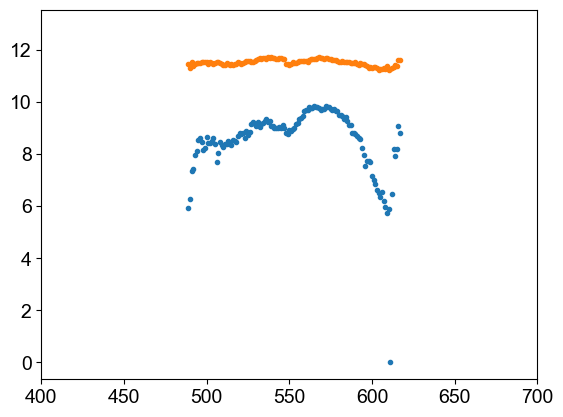

In [7]:
plt.plot(frames, c, 'o', markersize=3)
plt.plot(frames, b, 'o', markersize=3)
plt.xlim(400, 700)
# plt.ylim(6, 13)

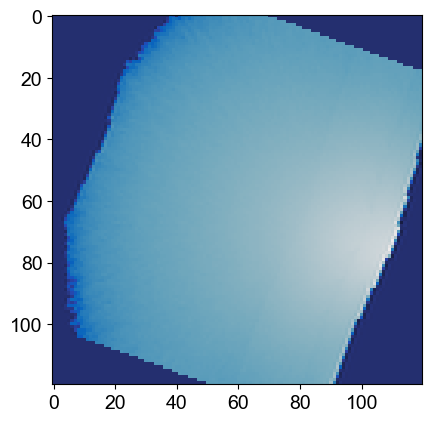

In [221]:


rotated_map_x = ndimage.rotate(map_x, 160, reshape=False)
plt.imshow(rotated_map_x, cmap=Colormap('cmocean:balance_blue').to_matplotlib())